# Non Homogeneous Equations and the Laplace Transform

So far we've focused on homogeneous systems. In practice this generally means systems with no "external" inputs. In order for these systems to do anything we need to set up non-trivial "initial conditions" that give the systems a "starting point" for interesting behavior. If there's an external input or stimulus we don't "need" initial conditions for interesting things to happen! The interesting things can be the consequence of the external stimulus. Unfortunately, this external force or stimulus make the equation non-homogeneous and adds complexity to the solution. This activity focuses on one particular approach to these non-homogeneous cases: The Laplace Transform. Let's discuss an example.

## A simple first order non-homogeneous system

Suppose we have a capacitor and resistor circuit like so:

![RC Circuit](images/circuit_act6a.png)

The stimulus in this case is the voltage $V_{in}(t)$ applied at the left inputs to the circuit which we can call $x(t)$ for short. The output is the voltage drop across the resistor $R$ which we'll call $V_{out}(t) or $y(t)$ for short. 

The output voltage $y(t)$ is just the input voltage minus the drop across the resistor $R$. What's the drop across the resistor? By Ohm's Law is the current through the resistor times the resistance $R$. What's the current through the resistor? It's the rate of change of the charge on the capacitor, which is $C$ times the rate of change of the voltage across the capacitor $dy/dt$. Let's convert all that to a mathematical statement.

$$ y(t) = x(t) - I(t)R $$

But

$$ I(t) = C \frac{dy}{dt} $$

So

$$ y(t) = x(t) - R C \frac{dy}{dt} $$

Hence

$$ \frac{dy}{dt} = \frac{1}{RC}\left ( x(t) - y(t) \right ) $$

Notice that the produce $RC$ has units of time, so sometimes folks rename it to $\tau = RC$ and rewrite the problem in "standard form" as:

$$ \frac{dy(t)}{dt} + \frac{y(t)}{\tau} = \frac{x(t)}{\tau} $$

Note that if $x(t) =  0$ this reduces to the standard first order linear homogeneous equation with constant coefficients, otherwise kown as exponential decay. We've become *very* familiar with this problem! However, with $x(t)$ not equal to zero we have a non-homogeneous situation. 

## The homogeneous solution and initial conditions

If $x(t)=0$ we know there's a general solution of the form:

$$ y(t) = y_0 e^{-t/\tau} $$

Where $y_0$ is chosen to satisfy the initial condition: $y(0) = y_0$. Note that if we find a solution that satisifes the non-homogeneous equation, let's call it $y_p(t)$, that we can always add any multiple of the homogeneous solution and it won't spoil the non-homogeneous solution. This is good news! It means that if we have initial conditions, we can use the general solution the homogeneous equation, in combination with the non-homogeneous solution, to solve *both* the non-homogeneous *and* the initial value problem, at the same time.

## A concrete case

Let's see how that works: Suppose $x(t) = V_0$, a constant, but we have $y(0) = 0$. Intuitively we expect that a constant input would lead to a constant output over time. However there may be a transient behavior that takes place until the system "settles down". Looking at the differential equation, what value would $y(t)$ have to have to make things work in the long run?

$$ \frac{dy(t)}{dt} + \frac{y(t)}{\tau} = \frac{x(t)}{\tau} $$

Well, if $y(t) = $ constant then $dy/dt=0$, so that would imply that

$$ 0 + \frac{y(t)}{\tau} = \frac{x(t)}{\tau} $$

or $y(t) = x(t) = V_0$, easy! But $y(t) = V_0$ can't also satisfy the initial condition that $y(0) = 0$, so that's where we need to add in the homogeneous solution: $y(t) = C e^{-t/\tau}$ to patch things up at $t=0$.

$$ y(t) = C e^{-t/\tau} + V_0 $$

If we substitute $t=0$ here we get:

$$ 0 = C + V_0 $$ 

So it's pretty easy to see that $C=-V_0$ would work. Let's put that in:

$$ y(t) = -V_0 e^{-t/\tau} + V_0 = V_0(1 - e^{-t/\tau})$$ 

for $t\geq 0$ and $y(t) = 0$ for $t < 0$.

So now we have a solution that works at $t=0$ and also satisifies the non-homogeneous equation at all times! Cool.

# Generalizing: The Laplace Transform

Does this approach work in general? Unfortunately, the answer is "no". In general $x(t)$ can be anything, and it's not usually so easy to simply "guess" a solution that works. There are many cases where you can assumee that the output has the same form as the input, and that is a good starting point, but it only really works in the simplest scenarios. To handle more general cases we really need a more powerful tool in our toolbelt. One of the most powerful tooks is the Laplace Transform. The idea is to transform the non-homogeneous linear differential equation into an algebraic equation that we can solve, and then transform back to get the solution. This doesn't work with equations that don't *have* a Laplace Transform, and it doesn't work with non-linear equations, so it's not completely general, but it works in many important practical situations, so it's worth learning for sure!

The Laplace Transform of a function $f(t)$ is defined as:

$$ F(s) = \int_{0^-}^\infty f(t) e^{-st}\,dt $$

There are a number of interesting properties of the Laplace Transform you can read about in the text and in the assigned videos. The most important is that the Laplace Transform converts a differential equation in the time ($t$) domain into an algebraic equation in the generalized frequency ($s$) domain. We can use the standard techniques of algebra to solve for the Laplace Transform of the solution and then convert back to the time domain to get the actual solution to the original differential equation.

Side note: I'm going to recommend a simplified version of the Laplace Transform that's used when you have a system with external stimuli but that is initially "at rest" (i.e., all initial conditions set to zero). Does this limit us? Not really. We already know a lot about finding linearly independent homogeneous solutions. We also know that we can add any linear combination of those homogeneous solutions to the solution of the "at rest" solution to create any not "at rest" solution. How does this help? The main advantage is that it drops all the initial conditions from the Laplace Transform of derivatives, which often litter expressions of the Laplace Transform when initial conditinos are not "at rest". Using this version of the Laplace Transform, it's usual to specify stimulus functions that are zero for $t < 0$. For our constant case we'd multiply $V_0$ by the unit step function $\theta(t)$ which is zero for $t<0$ and 1 for $t\geq 0$.

Another note: Actually 99% of the time you don't actually need to *do* the integral above, but you can rely on [tables](https://tutorial.math.lamar.edu/classes/de/laplace_table.aspx) of Laplace Transforms, or software (e.g., [colab](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)) to do that integral for you.

Let's try this approach  with the example above.


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Let's start with the general case:

$$ \frac{dy(t)}{dt} + \frac{y(t)}{\tau} = \frac{x(t)}{\tau} $$

Taking the Laplace Transform of both sides we get:

$$ \mathscr{L}\left (\frac{dy(t)}{dt}\right ) + \mathscr{L}\left(\frac{y(t)}{\tau}\right) = \mathscr{L}\left(\frac{x(t)}{\tau}\right) $$

$$ s Y(s) - y(0) + \frac{Y(s)}{\tau} =  \frac{X(s)}{\tau} $$

If we use the 'initially at rest' approach this simplifies to

$$ s Y(s) + \frac{Y(s)}{\tau} =  \frac{X(s)}{\tau} $$

Solving for $Y(s)$ we get:

$$ Y(s) = \frac{X(s)}{s\tau + 1} $$

Since in the example $x(t)$ was $V_0 u(t)$ we get $X(s) = V_0/s$, so:

$$ Y(s) = \frac{V_0}{s(s\tau + 1)}$$

Note that we can break this into two terms:

$$ Y(s) = \frac{V_0/\tau}{s(s + 1/\tau)} = \frac{A}{s} + \frac{B}{s+1/\tau}$$

for some values of $A$ and $B$. How do we get $A$ and $B$? Easy! See where the RHS blows up, at $s=0$ and $s=-1/\tau$. When $s \rightarrow 0$ we see that the $A$ term is the only one that counts, so the rest of the LHS, aside from the $1/s$ must match $A$. The rest of the LHS is just $V_0$ so $A=V_0$. As $s\rightarrow -1/\tau$ we can see we need to have $B=-V_0$, so we get:

$$ Y(s) = \frac{V_0}{s} - \frac{V_0}{s + 1/\tau} $$

Looking at the [tables](https://tutorial.math.lamar.edu/classes/de/laplace_table.aspx) of Laplace Transforms we see that this is just:

$$ y(t) = V_0 - V_0 e^{-t/\tau} = V_0(1 - e^{-t/\tau})\theta(t) $$

the same as we had before!

How do we do this with colab/sympy?

In [36]:
tau,t,V_0 = sp.symbols('tau t V_0', real=True)
s = sp.symbols('s')

In [37]:
x = V_0*sp.Heaviside(t) # heaviside is the unit step function theta(t)
x

V_0*Heaviside(t)

In [38]:
sp.laplace_transform(x,t,s) # Note, by default, laplace_transform returns a tuple including the conditions of convergence

(V_0/s, 0, True)

Note that, by default, the laplace transform returns tuple including the conditions of convergence. While this is interesting, it's not super convenient. I usually pass "nocond=True" unless I run into trouble, to streamline the process

In [39]:
X = sp.laplace_transform(x,t,s,noconds=True) # noconds=True returns only the transformed function
X

V_0/s

In [40]:
Y = sp.laplace_transform(x,t,s,noconds=True)/tau/(s+1/tau)
Y

V_0/(s*tau*(s + 1/tau))

In [43]:
Y = Y.apart(s) # ask sympy to do the partial fraction expansion for us
Y

-V_0*tau/(s*tau + 1) + V_0/s

In [42]:
sp.inverse_laplace_transform(Y,s,t,noconds=True)

V_0*Heaviside(t) - V_0*exp(-t/tau)*Heaviside(t)

Boom! Perfect. 

# What about a more complicated external stimulus?

Suppose $x(t)$ was more complicated? Maybe a pulse, a sinusoid, or a ramp function? Let's try a sinusoid.

$$ x(t) = V_0 \sin(\omega t) $$



In [73]:
omega = sp.symbols("omega", real=True)
x = V_0*sp.sin(omega*t)
X = sp.laplace_transform(x,t,s,noconds=True) # noconds=True returns only the transformed function
X

V_0*omega/(omega**2 + s**2)

In [69]:
Y = sp.laplace_transform(x,t,s,noconds=True)/tau/(s+1/tau) # but the solution uses the same steps!
Y

V_0*omega/(tau*(omega**2 + s**2)*(s + 1/tau))

Note that even though the stimulus is different, the circuit is the same, so we're still dividing by the same factor.

In [74]:
y = sp.inverse_laplace_transform(Y.subs({V_0:1,omega:12, tau:1}),s,t)


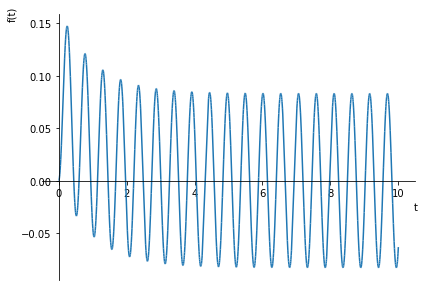

In [72]:
sp.plot(y,(t,0,10))